In [5]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from itertools import combinations
from tqdm.notebook import tqdm
from sklearn.manifold import TSNE

def getXY(csv, features=None, do_print=True):
    df = csv.copy()
    y_ori = np.array(df['type'])
    y_ori[y_ori == 0] = 0
    y_ori[y_ori == 2] = 1
    y_ori
    if(type(features) == type(None)):
        head = list(df.keys())
        head.remove('Unnamed: 0')
        head.remove('name')
        head.remove('score')
        head.remove('type')
        X_ori = np.array(df[head])
    else:
        X_ori = np.array(df[features])
    if(do_print):
        print(f"{X_ori.shape=} {y_ori.shape=}")
    return X_ori, y_ori

def train_model(X_ori,y_ori, do_print=True):
    X,y = X_ori.copy(), y_ori.copy()

    from sklearn.svm import SVC
    from sklearn.utils import shuffle
    from sklearn.model_selection import cross_val_score

    X_shuff,y_shuff = shuffle(X,y)
    model = SVC(kernel='rbf')
    cross = cross_val_score(model, X_shuff, y_shuff, cv=10)

    model = SVC(kernel='rbf')
    model.fit(X_shuff, y_shuff)
    ans = model.predict(X_shuff)
    acc = sum(ans == y_shuff) / len(y_shuff)
    if(do_print):
        print(acc, cross.mean(), cross)
        return model
    else:
        return model, acc, cross

from multiprocessing import Pool
def cal(p_id,head, comb_list):
    accs = []
    cvs = []
    combs = []
    X_embeddeds = []
    for index, comb in enumerate(comb_list):
        if(index % 1 == 0): print(f"\t{p_id} {index}/{len(comb_list)}")
        X,y = getXY(csv.copy(),features=head[list(comb)] , do_print=False)
        X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X)
        model_all, acc, cross = train_model(X,y, do_print=False)
        accs.append(acc)
        cvs.append(cross.mean())
        combs.append(comb)
        X_embeddeds.append(X_embedded)
    return combs,accs,cvs,X_embeddeds

X_ori.shape=(720, 133) y_ori.shape=(720,)


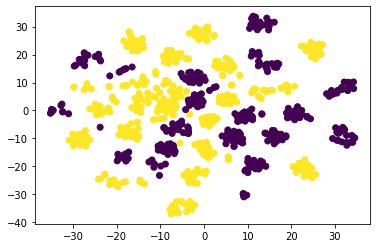

In [2]:
csv = pd.read_csv('export/15s_133features_filter_std_pca133.csv')
X,y = getXY(csv.copy())
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X)
plt.scatter(X_embedded[:,0],X_embedded[:,1], c=y)

X_ori.shape=(720, 8) y_ori.shape=(720,)


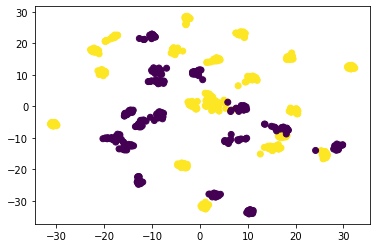

In [3]:
csv = pd.read_csv('export/15s_133features_filter_std_pca133.csv')
head = list(csv.columns)
head.remove('Unnamed: 0')
head.remove('name')
head.remove('score')
head.remove('type')
head = np.array(head)
X,y = getXY(csv.copy(), features=head[:8])
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X)
plt.scatter(X_embedded[:,0],X_embedded[:,1], c=y)

In [12]:
csv = pd.read_csv('export/15s_133features_filter_std_pca133.csv')
head = list(csv.columns)
head.remove('Unnamed: 0')
head.remove('name')
head.remove('score')
head.remove('type')
head = np.array(head)


comb_list = list(combinations(range(8),2))
# comb_list = [(0,1),(0,2)]
try:
    t_out = 60000
    pool = Pool()
    p_list = []
    combs, accs, cvs, embeds = [],[],[],[]
    p_num = 2
    for p_id in range(p_num):
        p_list.append(pool.apply_async( cal, [p_id, head,comb_list[p_id::p_num]] ))
    for i in range(p_num):        
        ans = p_list[i].get(timeout=t_out)
        # combs,accs,cvs,X_embedded
        combs = combs + ans[0]
        accs = accs + ans[1]
        cvs = cvs + ans[2]
        embeds = embeds + ans[3]
finally:
    print("========= close ========")
    pool.close() 
    pool.terminate()



# for comb in combinations(range(8),2):
#     X,y = getXY(csv.copy(), features=head[list(comb)], do_print=False)
#     X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X)
#     print(f"comb:{comb}")
#     plt.scatter(X_embedded[:,0],X_embedded[:,1], c=y)
#     plt.show()

	0 0/14	1 0/14

	1 1/14
	0 1/14
	1 2/14
	0 2/14
	1 3/14
	0 3/14
	1 4/14
	0 4/14
	1 5/14
	0 5/14
	0 6/14
	1 6/14
	0 7/14
	1 7/14
	1 8/14
	0 8/14
	1 9/14
	0 9/14
	1 10/14
	0 10/14
	1 11/14
	0 11/14
	1 12/14
	0 12/14
	1 13/14
	0 13/14
========= close ========


In [13]:
from utils import save
save(combs,'8-pca133-combs')
save(accs,'8-pca133-accs')
save(cvs,'8-pca133-cvs')
save(embeds,'8-pca133-embeds')

(0, 1) 0.7430555555555556 0.7319444444444445


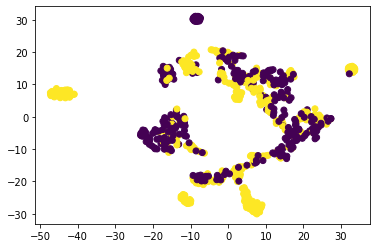

(0, 3) 0.7236111111111111 0.7041666666666667


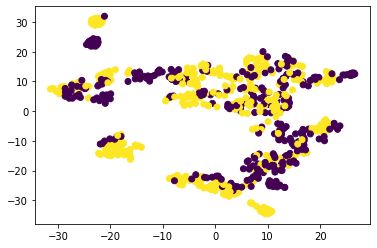

(0, 5) 0.7569444444444444 0.75


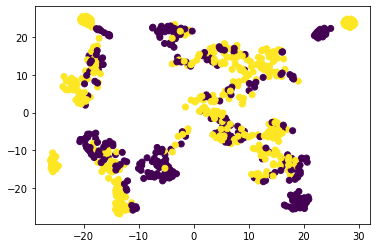

(0, 7) 0.8277777777777777 0.8180555555555555


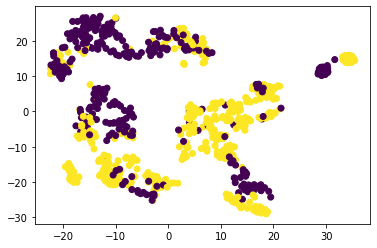

(1, 3) 0.6902777777777778 0.6847222222222221


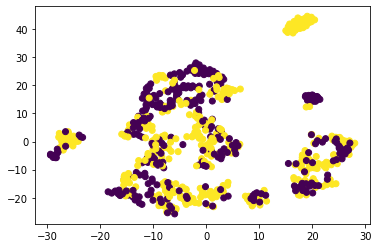

(1, 5) 0.6930555555555555 0.6819444444444445


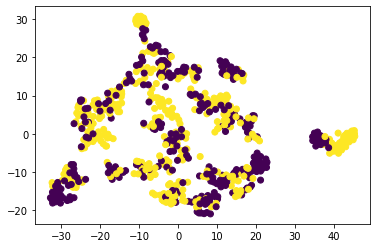

(1, 7) 0.7958333333333333 0.7805555555555556


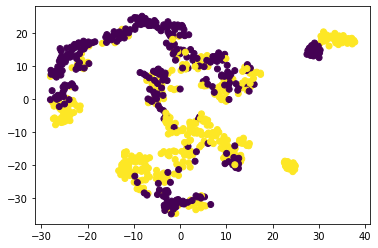

(2, 4) 0.7805555555555556 0.7708333333333334


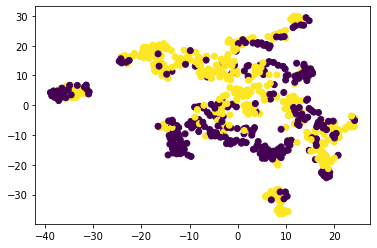

(2, 6) 0.7111111111111111 0.7027777777777777


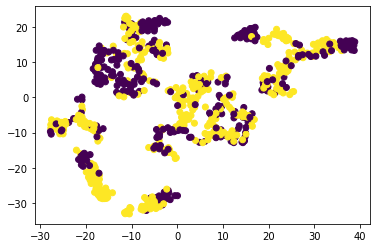

(3, 4) 0.7111111111111111 0.6972222222222222


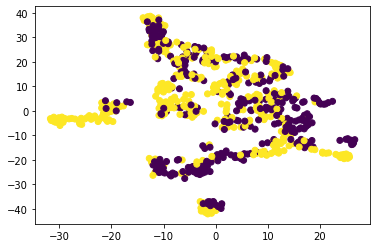

(3, 6) 0.7277777777777777 0.725


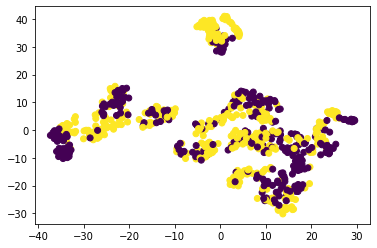

(4, 5) 0.7236111111111111 0.6972222222222222


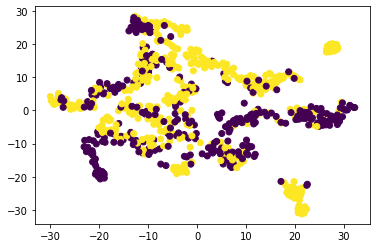

(4, 7) 0.8236111111111111 0.8027777777777778


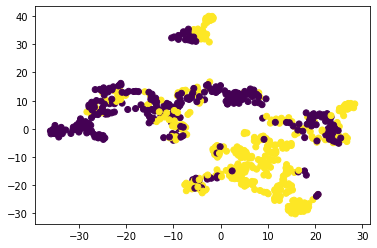

(5, 7) 0.8125 0.8


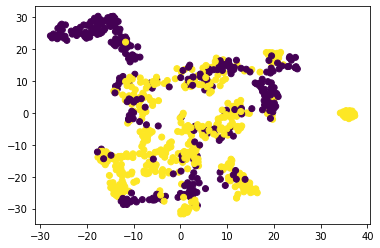

(0, 2) 0.6541666666666667 0.6444444444444445


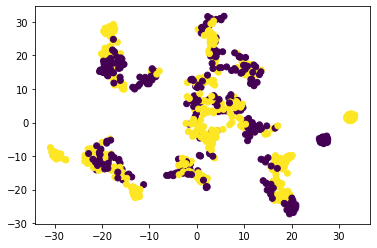

(0, 4) 0.7041666666666667 0.6972222222222222


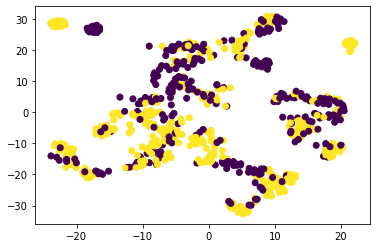

(0, 6) 0.6986111111111111 0.6861111111111111


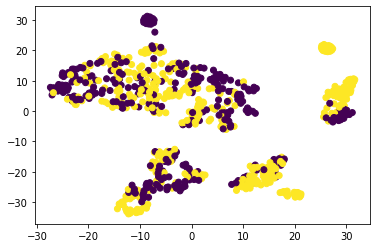

(1, 2) 0.7180555555555556 0.6944444444444444


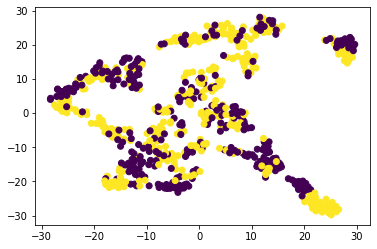

(1, 4) 0.7652777777777777 0.7527777777777777


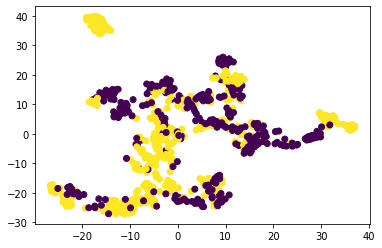

(1, 6) 0.6611111111111111 0.6430555555555555


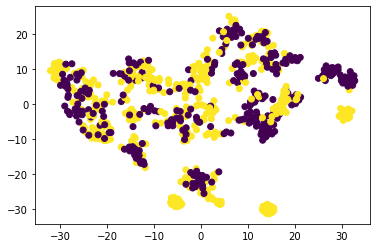

(2, 3) 0.6986111111111111 0.6666666666666666


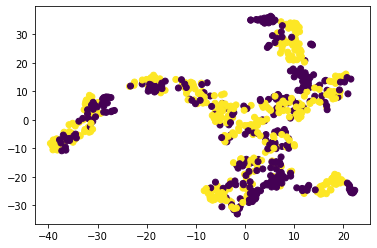

(2, 5) 0.6888888888888889 0.6847222222222221


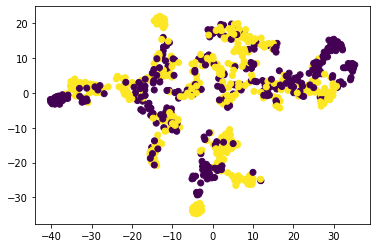

(2, 7) 0.7861111111111111 0.7652777777777777


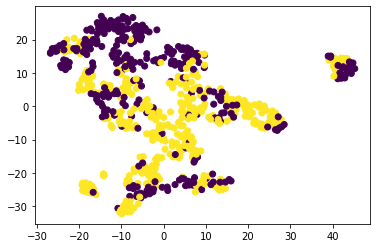

(3, 5) 0.6888888888888889 0.6694444444444445


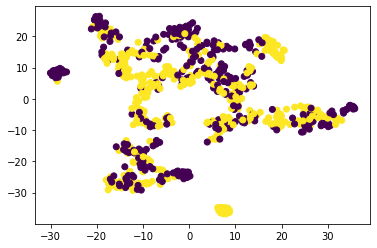

(3, 7) 0.7555555555555555 0.7319444444444445


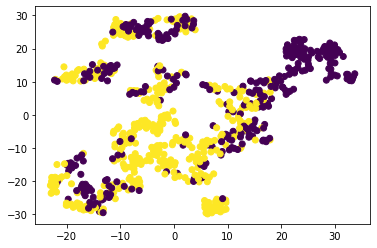

(4, 6) 0.6944444444444444 0.6930555555555556


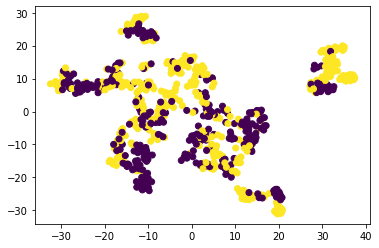

(5, 6) 0.7222222222222222 0.7041666666666666


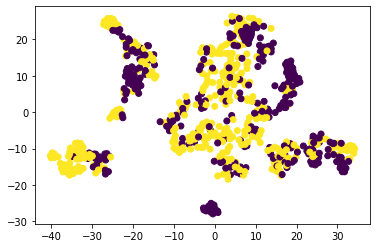

(6, 7) 0.775 0.7666666666666666


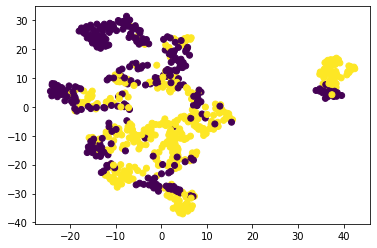

In [16]:
_,y = getXY(csv.copy(), do_print=False)
for index in range(len(combs)):
    comb = combs[index]
    acc = accs[index]
    cv = cvs[index]
    embed = embeds[index]

    print(f"{comb} {acc} {cv}")
    plt.scatter(embed[:,0], embed[:,1], c=y)
    plt.show()


(0, 7) 0.8277777777777777 0.8180555555555555


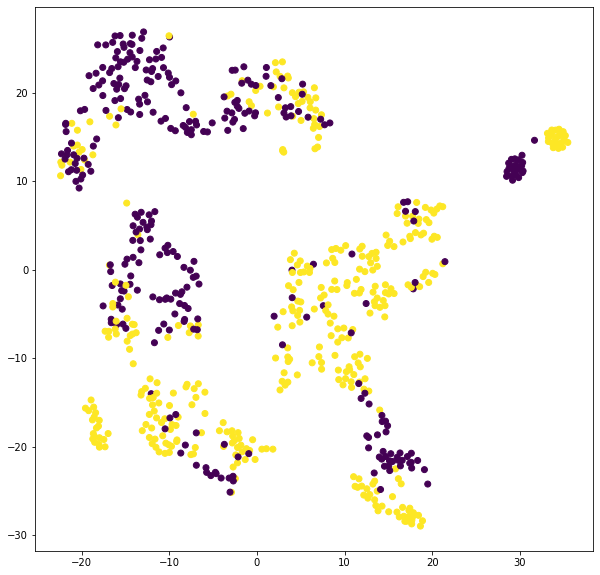

(4, 7) 0.8236111111111111 0.8027777777777778


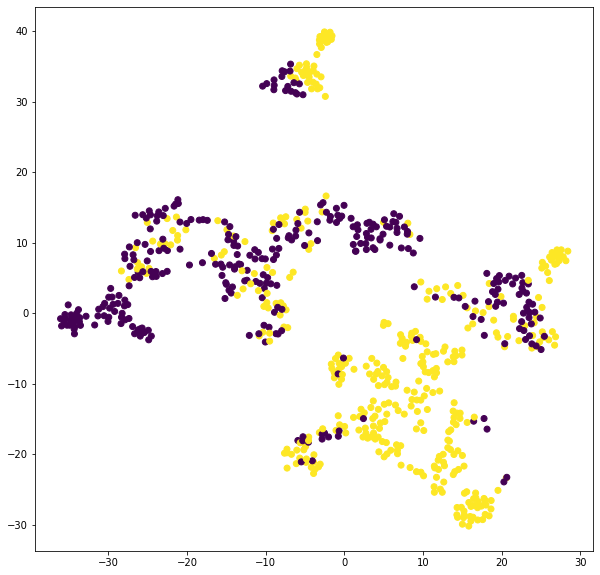

(5, 7) 0.8125 0.8


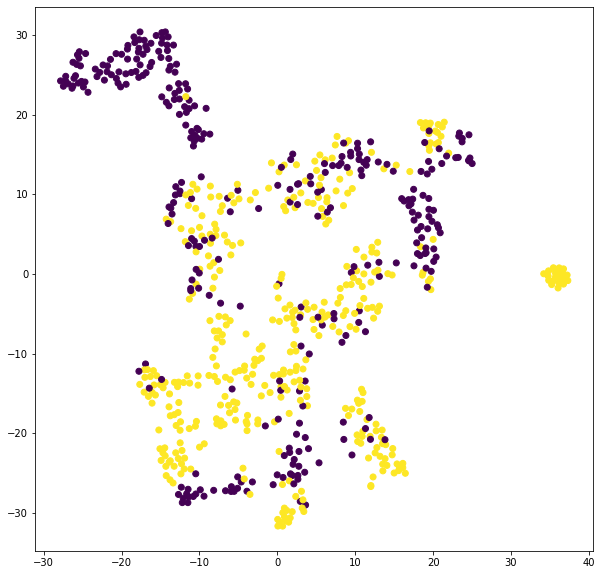

In [20]:
_,y = getXY(csv.copy(), do_print=False)
for index in range(len(combs)):
    comb = combs[index]
    acc = accs[index]
    cv = cvs[index]
    embed = embeds[index]
    if(acc < 0.8 ): continue
    print(f"{comb} {acc} {cv}")
    fig,ax = plt.subplots(figsize = (10,10))
    ax.scatter(embed[:,0], embed[:,1], c=y)
    plt.show()
